## Temporal Rainfall in St Louis

First we load our classes and methods from the python scripts in this repo:

In [116]:
from __init__ import *
from rain import *
from common import *

%matplotlib inline
import mpld3 

%load_ext autoreload
%aimport rain
%aimport common

Once our notebook is set up and all our packages are loaded, we can finally load the data. In St Louis, we had access to data from 21 gages from 2000 to 2006 recording at 10 minute intervals, and 101 gages from 2009 to 2014 recording at 15 minute intervals. Each of these sets of rain gages had corresponding radar rainfall data. From 2000 to 2006, the gages only recorded positive data, so there is a possibility that the values are underpredictions of the actual rainfall because a non-functioning gage would show up as a 0 instead of a NaN

In [4]:
path = './input/'

rg = Rain(path=path, name='StLouis_MSD_gage_{YEAR}.csv', year=range(2009, 2015), ngages=101)
rad = Rain(path=path, name='StLouis_MSD_radar_{YEAR}.csv', year=range(2009, 2015), ngages=101)
rg.ll_file = 'StLouis_MSD_lat_lon_{YEAR}.csv'.format(YEAR=rg.year)
rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll
p = RadarGage(gage=rg, radar=rad)
p.get_nonan()

rg21 = Rain(path=path, name='StLouis_MSD21_gage_{YEAR}.csv', year=range(2000, 2007), ngages=21, freq='10min', per_hour=6)
rad21 = Rain(path=path, name='StLouis_MSD21_radar_{YEAR}.csv', year=range(2000, 2007), ngages=21, freq='15min', per_hour=4)
rg21.ll_file = 'StLouis_MSD21_lat_lon.csv'
rg21.get_ll(cols=['lat','lon'])
rad21.ll = rg21.ll
rg21.reset_rate('30min')
rad21.reset_rate('30min')
p21 = RadarGage(gage=rg21, radar=rad21)
p21.get_nonan()

In [117]:
p21.save_path = p.save_path = rg.save_path = rad_save_path = rg21.save_path = rad21.save_path = './output/StLouis Summary/'

Now we might find it more interesting to look at temporal trends:

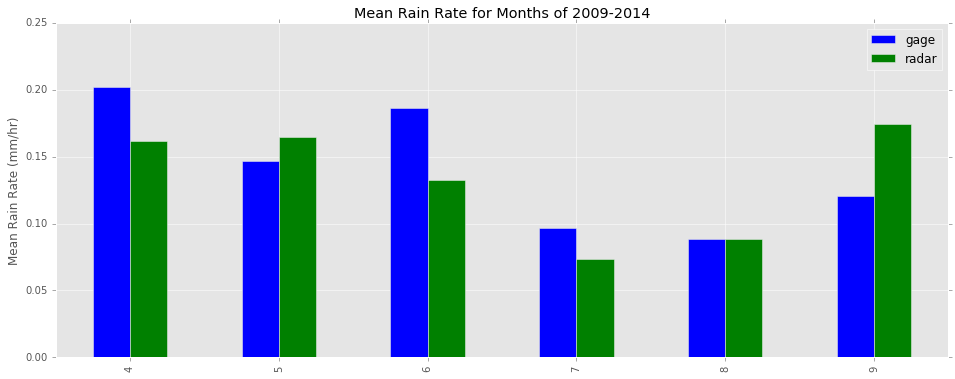

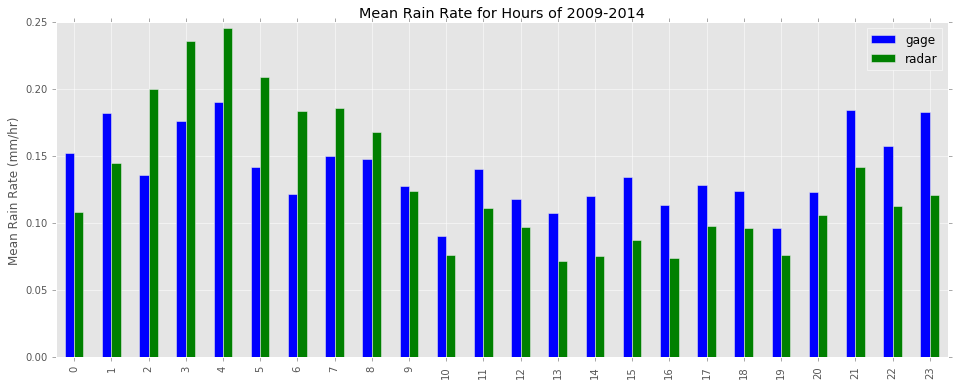

In [114]:
p.plot_rate(interval='seasonal')
p.plot_rate(interval='diurnal')

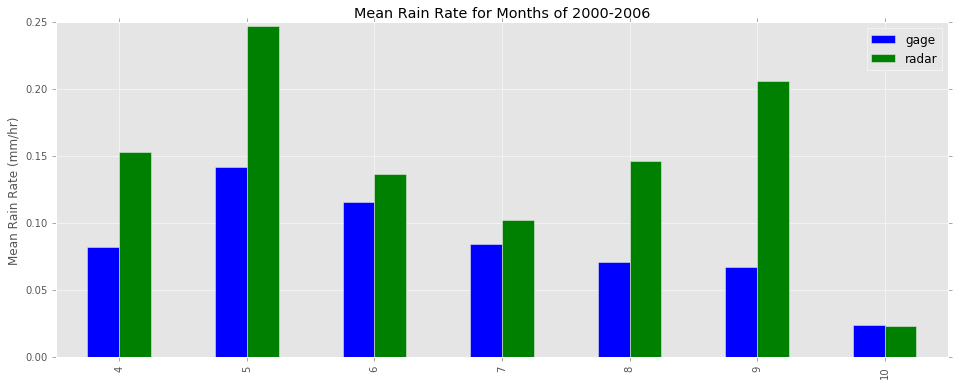

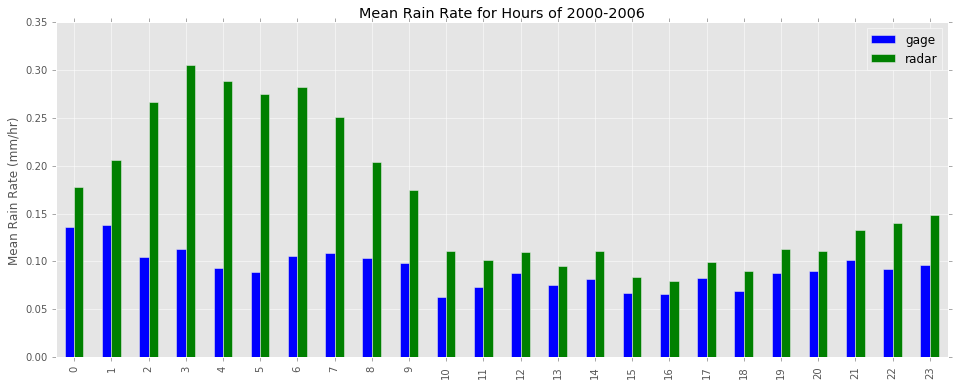

In [17]:
p21.plot_rate(interval='seasonal')
p21.plot_rate(interval='diurnal')

I don't know exaclty what it is about, but there is a very noticeable pattern in the radar data of high values in the hours between 0 and 10. This corresponds roughly to the local nighttime. We can compare just the radar data for the different sets of gages

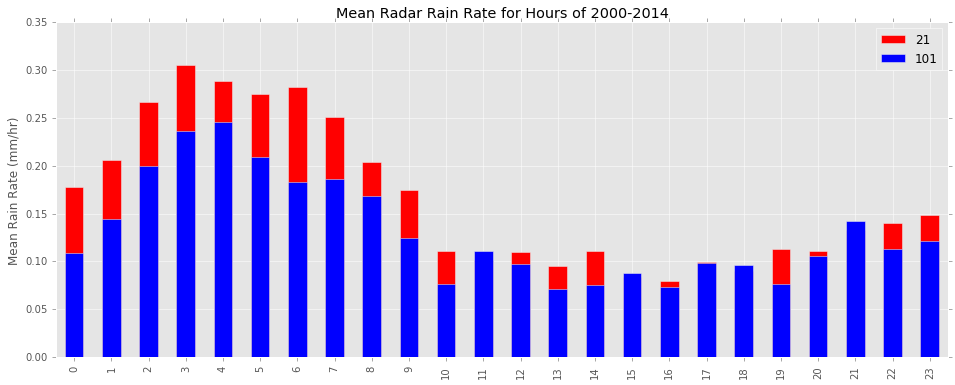

In [115]:
rad21.plot_rate(interval='diurnal', save=False, color='r')
rad.plot_rate(interval='diurnal', save=False, color='b')
plt.legend([21, 101])
title = 'Mean Radar Rain Rate for Hours of 2000-2014'
plt.title(title)
plt.savefig(p.save_path + title + 'jpg')

It can be helpful to look into the probability of a wettness rather that straight rates

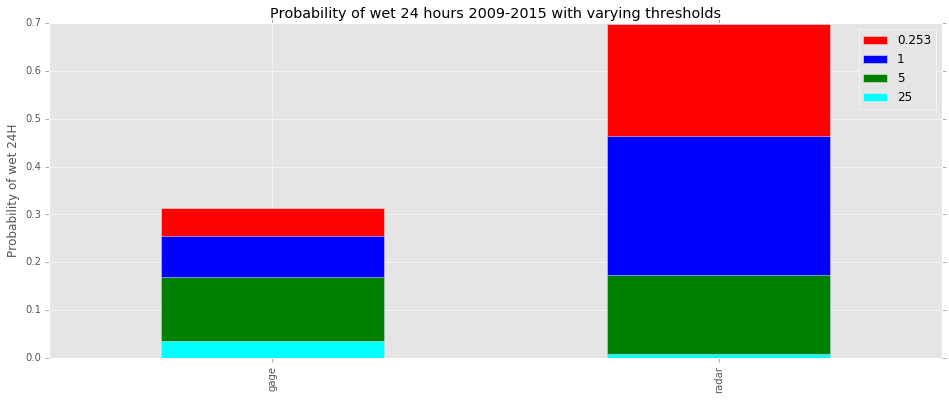

In [107]:
for mm, c in zip([.253, 1, 5, 25], ['red','blue','green','cyan']):
    p.thresh = mm * p.per_hour
    p.plot_prob_wet(time_step='24H', base=12, color=c, save=False)
plt.legend([.253, 1, 5, 25])
title = 'Probability of wet 24 hours 2009-2015 with varying thresholds'
plt.title(title)
plt.savefig(p.save_path + title + 'jpg')